## t-SNE, PCA, and FFT Experiments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Augmentation - Maxpooling, Subsampling, Averaging + Noising

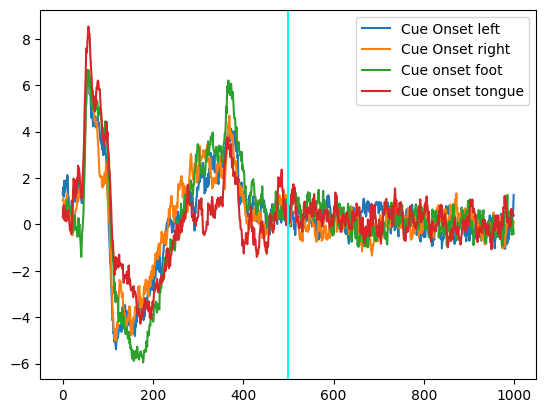

In [2]:
path = "../project/"
X_test = np.load(path + "X_test.npy")
y_test = np.load(path + "y_test.npy")
person_train_valid = np.load(path + "person_train_valid.npy")
X_train_valid = np.load(path + "X_train_valid.npy")
y_train_valid = np.load(path + "y_train_valid.npy")
person_test = np.load(path + "person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Visualizing the data

ch_data = X_train_valid[:,8,:] # extracts the 9th channel from the data


class_0_ind = np.where(y_train_valid == 0) # finds the indices where the label is 0
ch_data_class_0 = ch_data[class_0_ind] # finds the data where label is 0
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0) # finds the average representation of the 9th channel when label is 0


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])


In [3]:
def data_prep(X,y,sub_sample,average,noise):
    
    total_X = None
    total_y = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,500)
    X = X[:,:,0:500]
    print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,1000) -> (sample,22,500/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    
    
    total_X = X_max
    total_y = y
    print('Shape of X after maxpooling:',total_X.shape)
    
    # Averaging + noise 
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    print(X_average.shape)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    print('Shape of X after averaging+noise and concatenating:',total_X.shape)
    
    # Subsampling
    
    for i in range(sub_sample):
        
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
            
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
        
    
    print('Shape of X after subsampling and concatenating:',total_X.shape)
    return total_X,total_y


X_train_valid_prep,y_train_valid_prep = data_prep(X_train_valid,y_train_valid,2,2,True)


Shape of X after trimming: (2115, 22, 500)
Shape of X after maxpooling: (2115, 22, 250)
(2115, 22, 250)
Shape of X after averaging+noise and concatenating: (4230, 22, 250)
Shape of X after subsampling and concatenating: (8460, 22, 250)


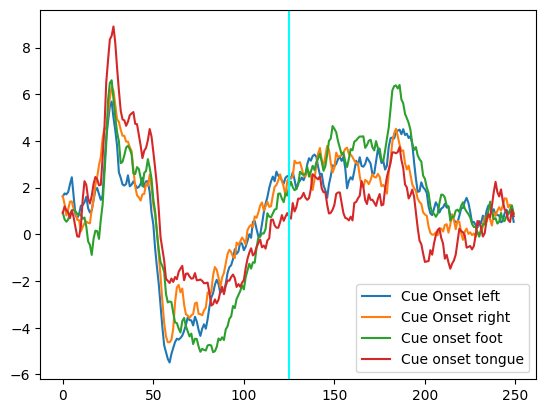

In [4]:

ch_data_prep = X_train_valid_prep[:,4,:] # extracts the 5th channel from the data


class_0_ind_prep = np.where(y_train_valid_prep == 0) # finds the indices where the label is 0
ch_data_class_0_prep = ch_data_prep[class_0_ind_prep] # finds the data where label is 0
avg_ch_data_class_0_prep = np.mean(ch_data_class_0_prep,axis=0) # finds the average representation of the 9th channel when label is 0


class_1_ind_prep = np.where(y_train_valid_prep == 1)
ch_data_class_1_prep = ch_data_prep[class_1_ind_prep]
avg_ch_data_class_1_prep = np.mean(ch_data_class_1_prep,axis=0)

class_2_ind_prep = np.where(y_train_valid_prep == 2)
ch_data_class_2_prep = ch_data_prep[class_2_ind_prep]
avg_ch_data_class_2_prep = np.mean(ch_data_class_2_prep,axis=0)

class_3_ind_prep = np.where(y_train_valid_prep == 3)
ch_data_class_3_prep = ch_data_prep[class_3_ind_prep]
avg_ch_data_class_3_prep = np.mean(ch_data_class_3_prep,axis=0)


plt.plot(np.arange(250),avg_ch_data_class_0_prep)
plt.plot(np.arange(250),avg_ch_data_class_1_prep)
plt.plot(np.arange(250),avg_ch_data_class_2_prep)
plt.plot(np.arange(250),avg_ch_data_class_3_prep)
plt.axvline(x=125, label='line at t=125',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])

## t-SNE and PCA Dimensionality Reduction

In [43]:
X_TSNE = X_train_valid_prep.reshape((X_train_valid_prep.shape[0], -1))

from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3, verbose=1, init='pca',perplexity=95, n_iter=300)

In [44]:
X_tsne = tsne.fit_transform(X_TSNE)

[t-SNE] Computing 286 nearest neighbors...
[t-SNE] Indexed 8460 samples in 0.051s...
[t-SNE] Computed neighbors for 8460 samples in 11.778s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8460
[t-SNE] Computed conditional probabilities for sample 2000 / 8460
[t-SNE] Computed conditional probabilities for sample 3000 / 8460
[t-SNE] Computed conditional probabilities for sample 4000 / 8460
[t-SNE] Computed conditional probabilities for sample 5000 / 8460
[t-SNE] Computed conditional probabilities for sample 6000 / 8460
[t-SNE] Computed conditional probabilities for sample 7000 / 8460
[t-SNE] Computed conditional probabilities for sample 8000 / 8460
[t-SNE] Computed conditional probabilities for sample 8460 / 8460
[t-SNE] Mean sigma: 383.257278
[t-SNE] KL divergence after 50 iterations with early exaggeration: 79.315094
[t-SNE] KL divergence after 300 iterations: 1.842353


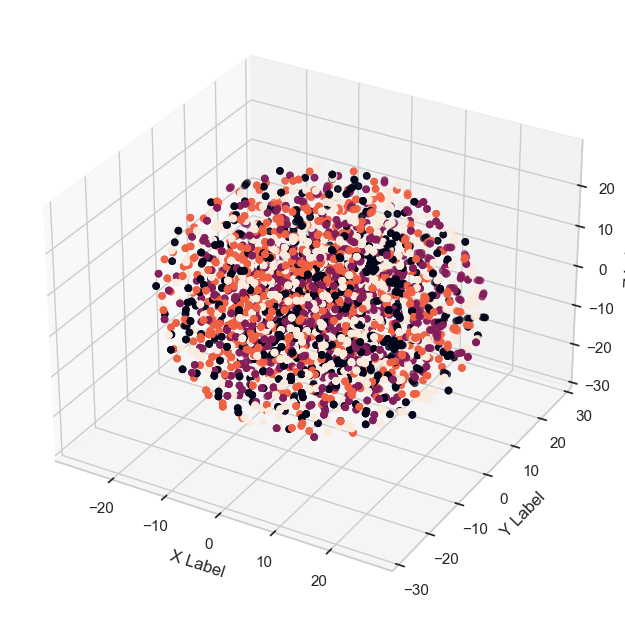

In [46]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c=y_train_valid_prep, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


plt.show()

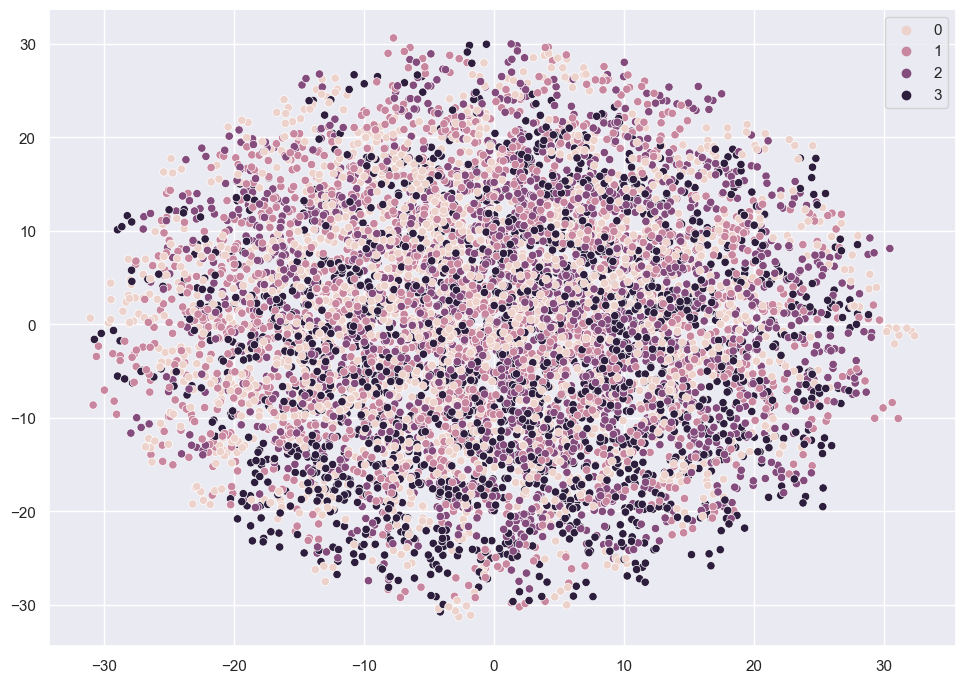

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train_valid_prep)
plt.show() 

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=22)
pca_result = pca.fit_transform(X_train_valid_prep)

print(pca.explained_variance_ratio_)

##  FFT Transform Analysis

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Define function to perform FFT on the EEG data
def fft_eeg_data(eeg_data):
    n_samples = eeg_data.shape[2]
    fft_data = np.fft.fft(eeg_data, axis=2)
    psd_data = np.abs(fft_data) ** 2 / n_samples
    return psd_data[:, :, :n_samples//2]


# Define the labels for the plot
labels = ['Cue Onset Left', 'Cue Onset Right', 'Cue Onset Foot', 'Cue Onset Tongue']


# Calculate the FFT transformed data for the EEG data
fft_data = fft_eeg_data(X_train_valid_prep)



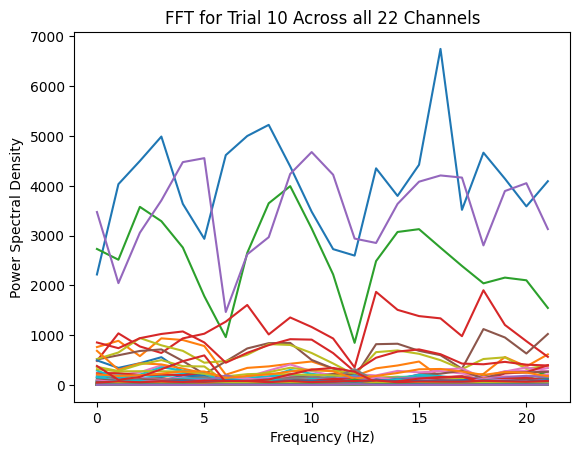

In [16]:
trial = 10 

plt.plot(fft_data[trial])
plt.title(f"FFT for Trial {trial} Across all 22 Channels")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.show() 

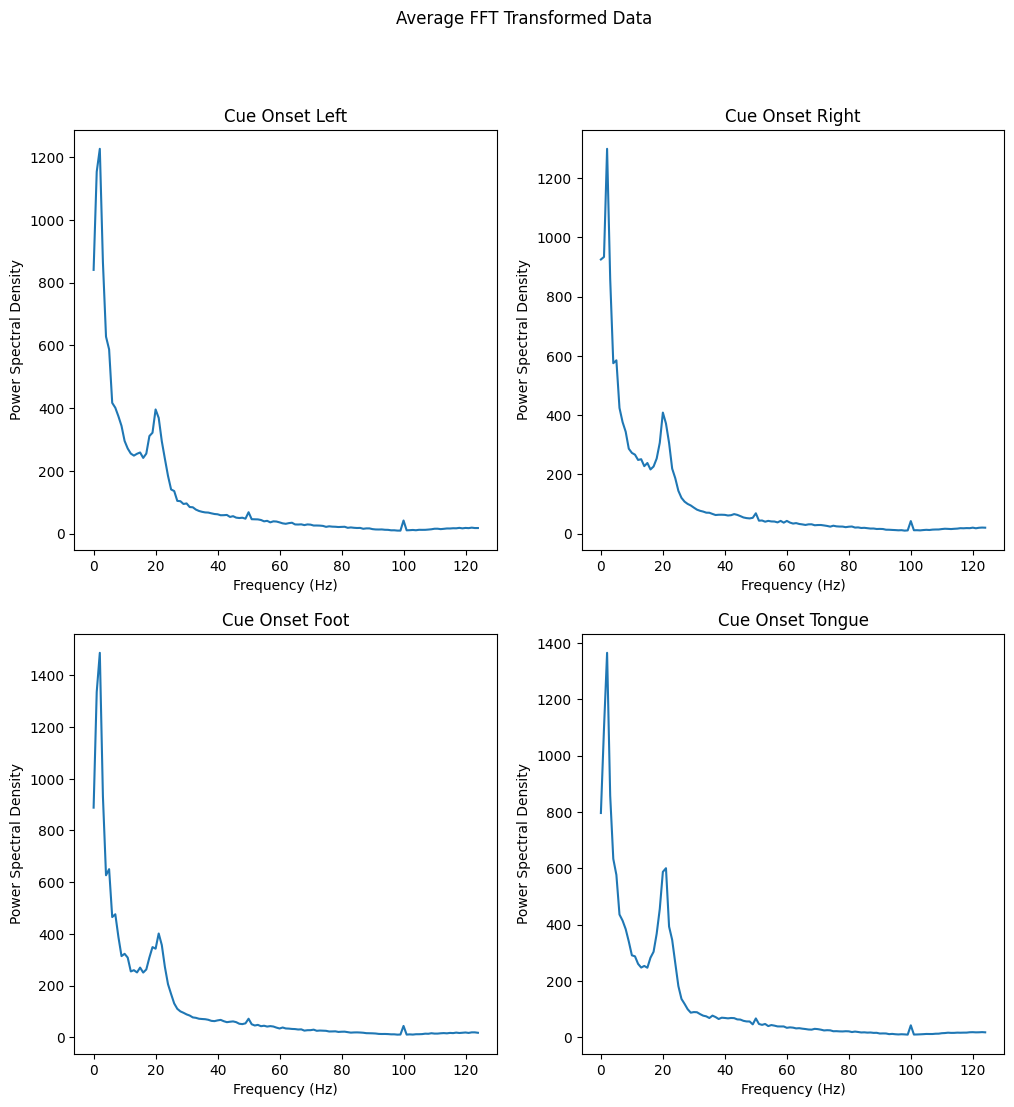

In [8]:

# Calculate the average FFT transformed data for each class
avg_fft_data = np.zeros((4, X_train_valid_prep.shape[1], X_train_valid_prep.shape[2]//2))
for i in range(4):
    avg_fft_data[i] = np.mean(fft_data[y_train_valid_prep == i], axis=0)


# Create a figure and axis object for the plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))


# Loop over the four classes and plot the average FFT transformed data for each class
for i, label in enumerate(labels):
    row = i // 2
    col = i % 2
    axs[row, col].plot(np.mean(avg_fft_data[i], axis=0))
    axs[row, col].set_title(label)
    axs[row, col].set_xlabel('Frequency (Hz)')
    axs[row, col].set_ylabel('Power Spectral Density')


# Add a title to the plot
fig.suptitle('Average FFT Transformed Data')


# Show the plot
plt.show()